In [21]:
import os
import numpy as np
import pandas as pd
from itertools import product
from collections import defaultdict
from utils.constant import ViTExperiment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
ds = "c100"
run_all = True
true_labels = range(100) if ds == "c100" else None
tgt_split = "repair"
agg = "abs_mean"
# agg = "mean"

In [22]:
def plot_prob_diff(df, x_axis="num_weights", unique_combinations=None, agg="mean"):
    # 平均と標準偏差を計算
    grouped_df = df.groupby([x_axis, "fl_method", "op"])["diff_proba_mean"].agg([agg, "std"]).reset_index()

    # プロット
    plt.figure(figsize=(10, 6))
    if unique_combinations is None:
        for fl_method in grouped_df["fl_method"].unique():
            for op in grouped_df["op"].unique():
                # fl_method, opごとに，nに対する平均と標準偏差をプロット
                subset = grouped_df[(grouped_df["fl_method"] == fl_method) & (grouped_df["op"] == op)]
                plt.plot(subset[x_axis], subset[agg], label=f"{fl_method}, {op}", marker="o")
                if agg == "mean" or agg == "median":
                    plt.fill_between(
                        subset[x_axis],
                        subset[agg] - 0.5 * subset["std"],
                        subset[agg] + 0.5 * subset["std"],
                        alpha=0.1
                    )
    else:
        for fl_method, op in list(unique_combinations.itertuples(index=False, name=None)):
            subset = grouped_df[(grouped_df["fl_method"] == fl_method) & (grouped_df["op"] == op)]
            plt.plot(subset[x_axis], subset[agg], label=f"{fl_method}, {op}", marker="o")
            if agg == "mean" or agg == "median":
                plt.fill_between(
                    subset[x_axis],
                    subset[agg] - 0.5 * subset["std"],
                    subset[agg] + 0.5 * subset["std"],
                    alpha=0.1
                )

    # グラフの設定
    plt.xlabel(x_axis)
    plt.ylabel(f"{agg.title()} Change of Probability (%)")
    plt.title("Change of Probability by n, fl_method, and op")
    plt.legend(title="Method, Op", loc="upper left")
    plt.grid(True)
    plt.show()

# `101b_analyze_proba_diff.py` をやった後の結果を可視化する

In [23]:
csv_path = os.path.join(f"./{ds}_proba_diff_{agg}_run_all.csv")
df_run_all = pd.read_csv(csv_path)
# run_allの場合，実際に特定される重み数は4n^2
df_run_all["num_weights"] = 4 * (df_run_all["n"] ** 2)
print(df_run_all.shape)
df_run_all.head()

(6000, 9)


,n,k,tgt_rank,misclf_type,fpfn,fl_method,op,diff_proba_mean,num_weights
0,5,0,1,all,NaN,vdiff,enh,0.000176,100
1,5,0,1,all,NaN,random,enh,0.000015,100
2,5,0,1,all,NaN,vdiff,sup,0.000201,100
3,5,0,1,all,NaN,random,sup,0.000014,100
4,5,0,1,src_tgt,NaN,vdiff,enh,0.000106,100


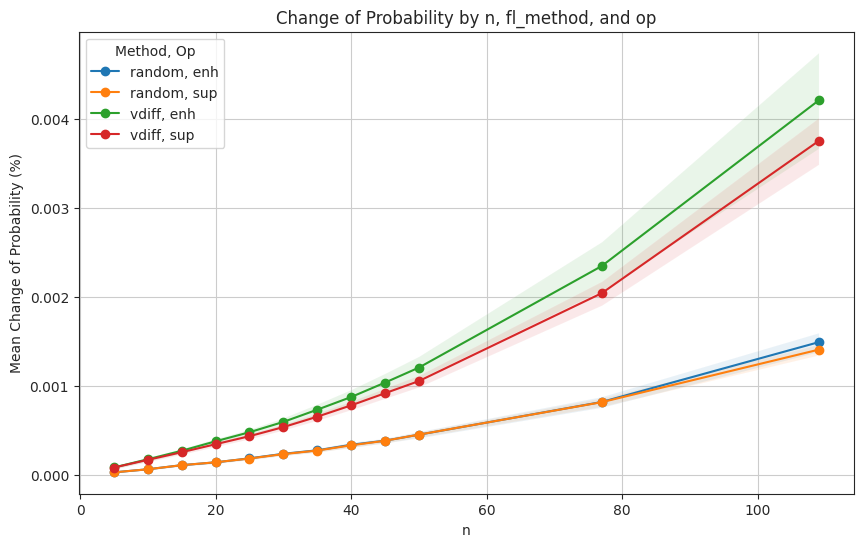

In [24]:
plot_prob_diff(df_run_all, x_axis="n")

In [25]:
csv_path = os.path.join(f"./{ds}_proba_diff_{agg}_run_asc_desc.csv")
df_asc_desc = pd.read_csv(csv_path)
# run_allの場合，実際に特定される重み数は8n^2
df_asc_desc["num_weights"] = 8 * (df_asc_desc["n"] ** 2)
print(df_asc_desc.shape)
df_asc_desc.head()

(3000, 9)


,n,k,tgt_rank,misclf_type,fpfn,fl_method,op,diff_proba_mean,num_weights
0,4,0,1,all,NaN,vdiff_asc_vdiff_desc,ae_ds,0.000091,128
1,4,0,1,all,NaN,vdiff_asc_vdiff_desc,as_de,0.000096,128
2,4,0,1,src_tgt,NaN,vdiff_asc_vdiff_desc,ae_ds,0.000109,128
3,4,0,1,src_tgt,NaN,vdiff_asc_vdiff_desc,as_de,0.000105,128
4,4,0,1,tgt,NaN,vdiff_asc_vdiff_desc,ae_ds,0.000156,128


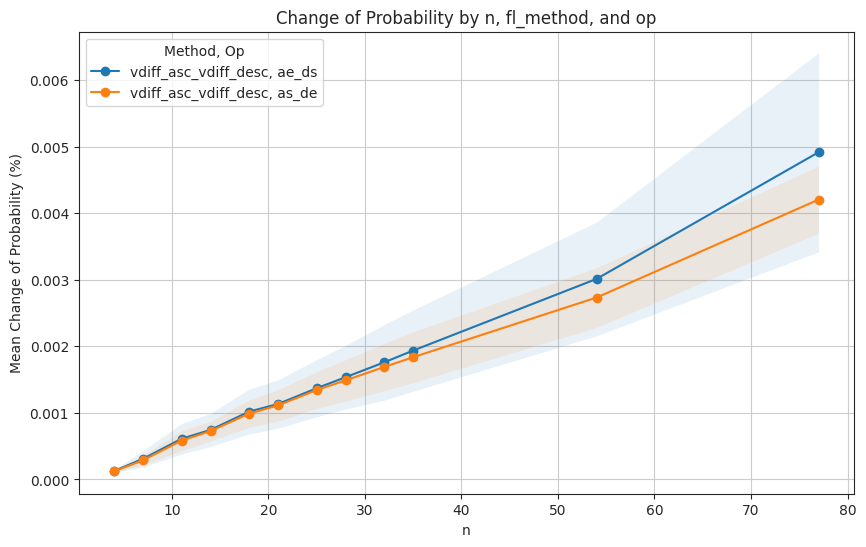

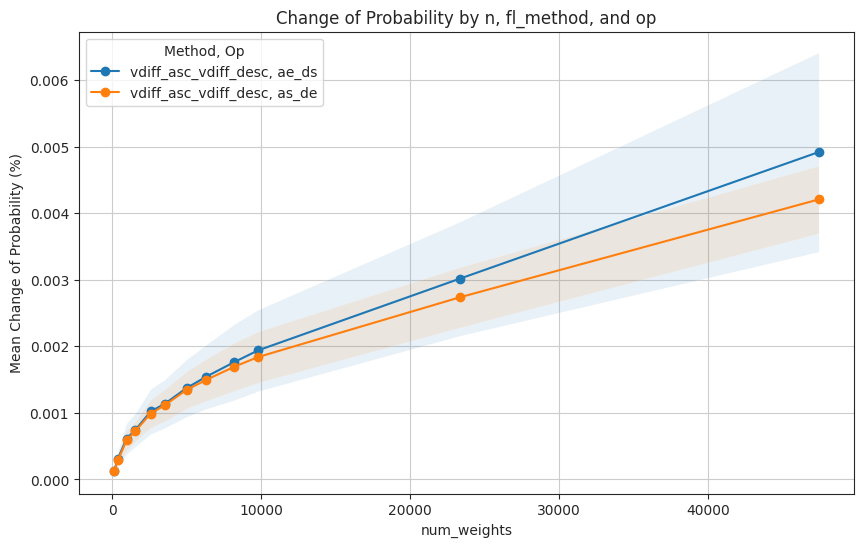

In [26]:
plot_prob_diff(df_asc_desc, x_axis="n")
plot_prob_diff(df_asc_desc, x_axis="num_weights")

In [27]:
csv_path = os.path.join(f"./{ds}_proba_diff_{agg}_run_asc_desc_vdiff_desc.csv")
df_vdiff_desc = pd.read_csv(csv_path)
# run_allの場合，実際に特定される重み数は8n^2
df_vdiff_desc["num_weights"] = 8 * (df_vdiff_desc["n"] ** 2)
print(df_vdiff_desc.shape)
df_vdiff_desc.head()

(3000, 9)


,n,k,tgt_rank,misclf_type,fpfn,fl_method,op,diff_proba_mean,num_weights
0,4,0,1,all,NaN,vdiff_desc,de,0.000044,128
1,4,0,1,all,NaN,vdiff_desc,ds,0.000044,128
2,4,0,1,src_tgt,NaN,vdiff_desc,de,0.000089,128
3,4,0,1,src_tgt,NaN,vdiff_desc,ds,0.000087,128
4,4,0,1,tgt,NaN,vdiff_desc,de,0.000081,128


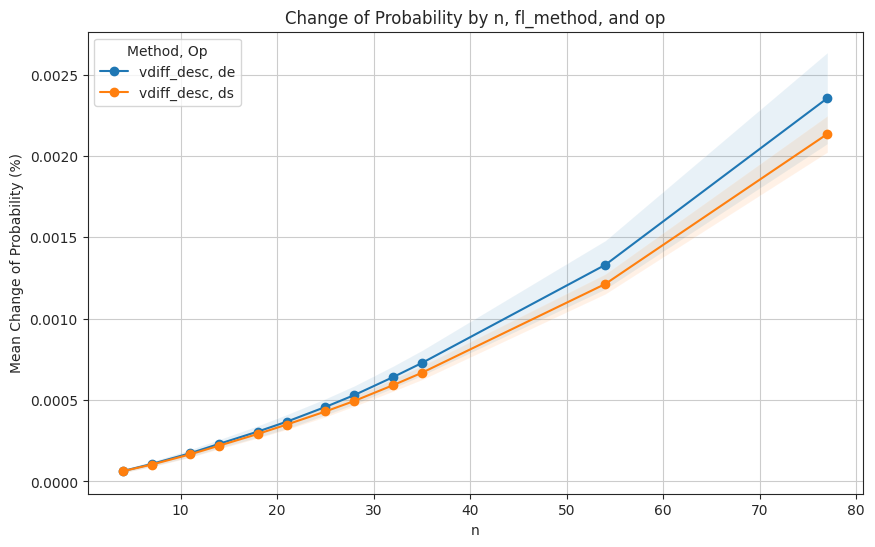

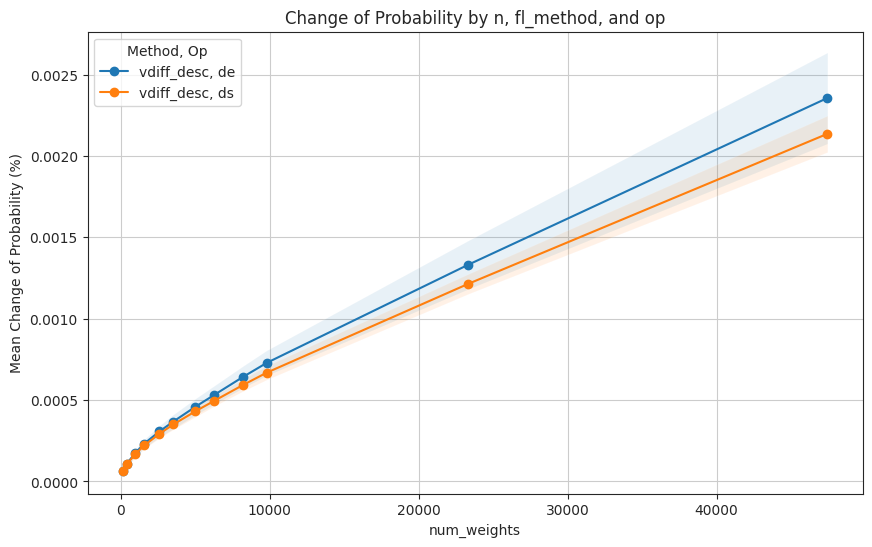

In [28]:
plot_prob_diff(df_vdiff_desc, x_axis="n")
plot_prob_diff(df_vdiff_desc, x_axis="num_weights")

In [29]:
# df_run_allとdf_asc_descを結合
df = pd.concat([df_run_all, df_asc_desc, df_vdiff_desc], ignore_index=True)
print(df.shape)
df

(12000, 9)


,n,k,tgt_rank,misclf_type,fpfn,fl_method,op,diff_proba_mean,num_weights
0,5,0,1,all,NaN,vdiff,enh,0.000176,100
1,5,0,1,all,NaN,random,enh,0.000015,100
2,5,0,1,all,NaN,vdiff,sup,0.000201,100
3,5,0,1,all,NaN,random,sup,0.000014,100
4,5,0,1,src_tgt,NaN,vdiff,enh,0.000106,100
...,...,...,...,...,...,...,...,...,...
11995,77,4,5,tgt,NaN,vdiff_desc,ds,0.001984,47432
11996,77,4,5,tgt,fp,vdiff_desc,de,0.002738,47432
11997,77,4,5,tgt,fp,vdiff_desc,ds,0.002272,47432
11998,77,4,5,tgt,fn,vdiff_desc,de,0.002439,47432


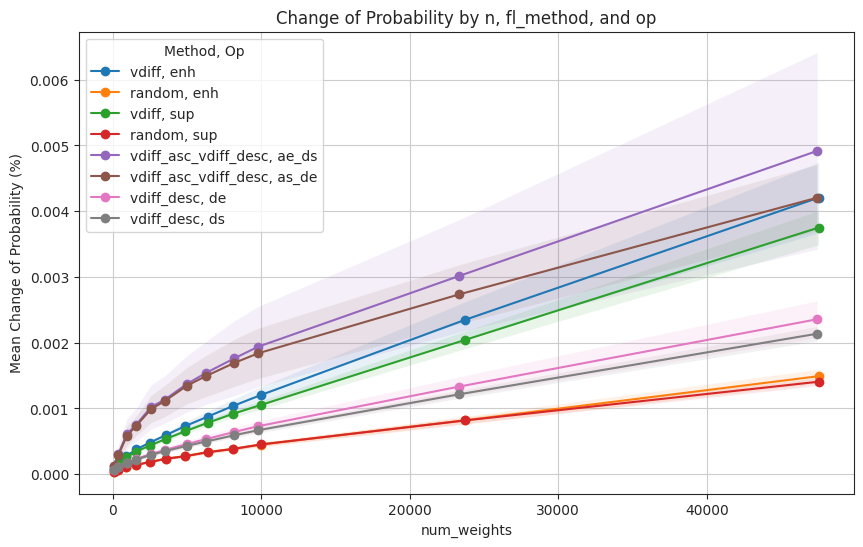

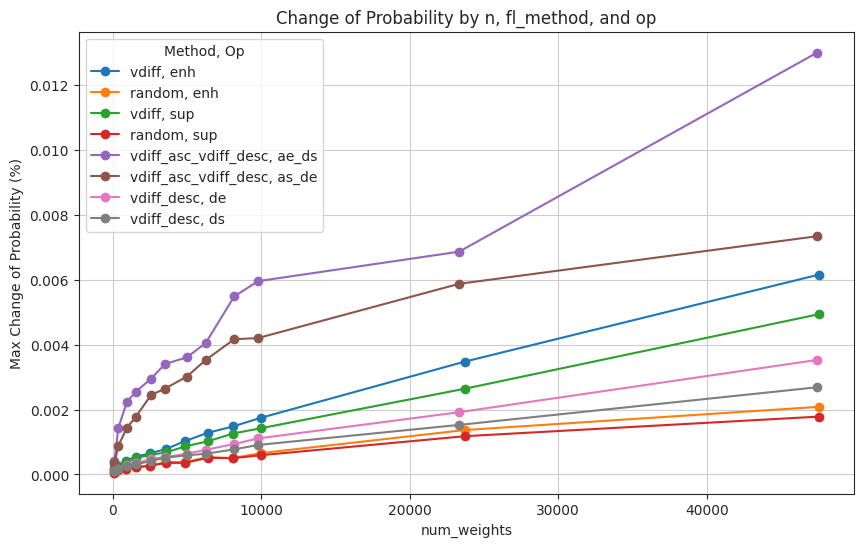

In [30]:
unique_combinations = df[["fl_method", "op"]].drop_duplicates().reset_index(drop=True)
plot_prob_diff(df, x_axis="num_weights", unique_combinations=unique_combinations)
plot_prob_diff(df, x_axis="num_weights", unique_combinations=unique_combinations, agg="max")